In [1]:
%matplotlib inline
import quantstats as qs
import os
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

# fetch the daily returns for a stock
# my_return = qs.utils.download_returns('META')


In [2]:
import pandas as pd
p10path="C:\\Users\\Asus\\Documents\\p10-dailysummary-20240516.csv"
p10 = pd.read_csv(p10path)
p10['ret_rate'] = p10.return_amt / p10['beginassetvalue']
p10.recorddate = pd.to_datetime(p10['recorddate'])
p10 = p10.rename(columns={'recorddate':'Date'}).set_index('Date')
p10.head()

,compkey,NAV,units,beginassetvalue,assetvalue,Mgmt_fee,Perf_fee,Others_fee,return_rate,hw_mark,...,acc_return_amt,acc_return_rate,day_count,init_mark,return_amt,SettledCode,acc_Others_fee,daily_Mgmt_fee,CASH,ret_rate
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-21,10.2023-09-21,0.0,100.0,0.0,0.0,0.00,0.0,0.0,0.000,0.0,...,0.0,0.0,1,0.0,0.0,r,0.0,0.00,0.00,NaN
2023-09-22,10.2023-09-22,50000.0,100.0,0.0,5000000.0,0.00,0.0,0.0,0.000,5000000.0,...,0.0,0.0,2,0.0,0.0,r,0.0,0.00,5000000.00,NaN
2023-09-23,10.2023-09-23,50000.0,100.0,5000000.0,5000000.0,273.97,0.0,0.0,0.000,5000000.0,...,0.0,0.0,3,0.0,0.0,r,0.0,273.97,5000000.00,0.000
2023-09-24,10.2023-09-24,50000.0,100.0,5000000.0,5000000.0,547.94,0.0,0.0,0.000,5000000.0,...,0.0,0.0,4,0.0,0.0,r,0.0,273.97,5000000.00,0.000
2023-09-25,10.2023-09-25,49950.0,100.0,5000000.0,4995000.0,821.91,0.0,5000.0,-0.001,5000000.0,...,-5000.0,0.0,5,0.0,-5000.0,r,5000.0,273.97,1458717.88,-0.001


In [4]:
p10_return = p10['ret_rate']
p10_return.index[0], p10_return.index[-1]

(Timestamp('2023-09-21 00:00:00'), Timestamp('2024-05-16 00:00:00'))

In [5]:
benmark = qs.utils.download_returns('^DJI')

[*********************100%%**********************]  1 of 1 completed


In [11]:
benmark

Date
1992-01-02         NaN
1992-01-03    0.009173
1992-01-06   -0.000437
1992-01-07    0.001469
1992-01-08   -0.000281
                ...   
2024-05-17    0.003366
2024-05-20   -0.004920
2024-05-21    0.001664
2024-05-22   -0.005065
2024-05-23   -0.015270
Name: Close, Length: 8159, dtype: float64

In [7]:
# # show sharpe ratio
# distribution =  qs.stats.distribution(my_return)
# print("geometric_mean: ", qs.stats.geometric_mean(my_return))
# print("expected_return : ", qs.stats.expected_return(my_return))

# print("sharpe: ", qs.stats.sharpe(my_return))



In [8]:
# or using extend_pandas() :)
print("sharp:{}".format(p10_return.sharpe()))

sharp:1.606441025999637


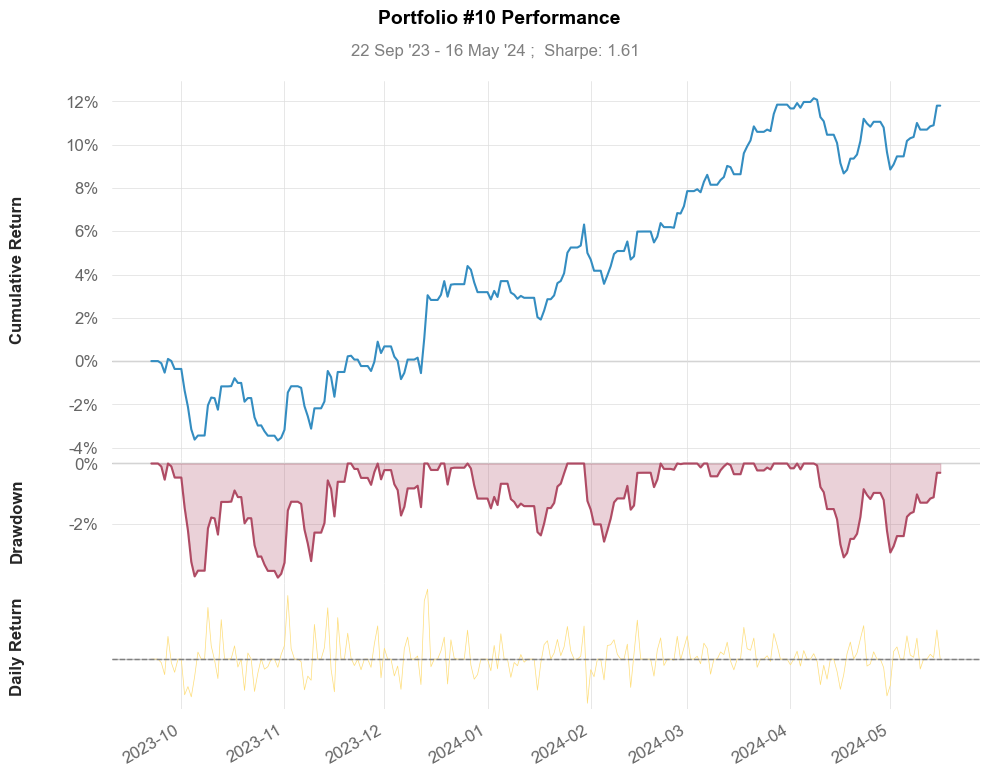

In [9]:
qs.plots.snapshot(p10_return, title='Portfolio #10 Performance', show=True)

# can also be called via:
# stock.plot_snapshot(title='Facebook Performance', show=True)

In [10]:
# idx = "^HSI"
# current_dir = os.getcwd()
# rpt_file=os.path.join(current_dir, "Reports", "p10-{}-bench_mark.html".format(idx))  
# print(rpt_file)
# qs.reports.html(my_return, idx, title="Portfolio #10 Performance", strategy_title="P10", output=rpt_file)

In [14]:
# (benchmark can be a pandas Series or ticker)
idx = "^DJI"
current_dir = os.getcwd()
rpt_file=os.path.join(current_dir, "Reports", "p10-{}-bench_mark.html".format(idx))  
qs.reports.html(p10_return, benmark, title="Portfolio #10 Performance", strategy_title="P10", output=rpt_file)

C:\Users\Asus\anaconda3\envs\QuantAnalysis\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Asus\anaconda3\envs\QuantAnalysis\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Asus\anaconda3\envs\QuantAnalysis\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not

In [16]:
# (benchmark can be a pandas Series or ticker)
idx = "^ZB=F"
current_dir = os.getcwd()
rpt_file=os.path.join(current_dir, "Reports", "p10-{}-bench_mark.html".format(idx))  
qs.reports.html(my_return, idx, title="Portfolio #10 Performance", strategy_title="P10", output=rpt_file)

[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['^ZB=F']: Exception('%ticker%: No timezone found, symbol may be delisted')
C:\Users\Asus\anaconda3\envs\QuantAnalysis\lib\site-packages\quantstats\utils.py:269: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  .pct_change()
C:\Users\Asus\anaconda3\envs\QuantAnalysis\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Asus\anaconda3\envs\QuantAnalysis\lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.pro

In [12]:
# [f for f in dir(qs.stats) if f[0] != '_']

In [13]:
# [f for f in dir(qs.utils) if f[0] != '_']